# Introduction
In this artical we’re going to model the Bike Sharing Dataset from the Capital Bikeshare System using regression modeling and learn how variables such as temperature, wind, and time affect bicycle rentals in the mid-Atlantic region of the United States

The data is graciously made available through the UCI Machine Learning Repository of the University of California, Irvine (https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).

This project is done while reading and learning the book
Quickly Turn Python ML Ideas into Web Applications on the Serverless Cloud
Authors: Amunategui, Manuel, Roopaei, Mehdi

# Understanding Bike Rental Demand with Regression Coefficients

here we will be building a simple and intutive way of interacting with environment factors such as temperature, wind, time and weather and anylyse how they efect the bike rentals 

# Exploring bike sharing dataset

Bike sharing is a very demaded and popular but still a new and experimental process.Using a mobile phone, a rider can sign up online, download a phone application, locate bicycles, and rent one. their are many application in appstore and play store like
Wheelstreet
WICKEDRIDE
Zoomcar for pedel
and many more

This model creates an entire ecosystem where nobody needs to talk or meet in person to start enjoying this service

According to Hadi Fanaee-T of the Laboratory of Artificial Intelligence and Decision Support (from the liner notes on the UCI Machine Learning Repository’s Dataset Information):

on italics

Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns [a] bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of [the] important events in the city could be detected via monitoring these data.1

The download contains two datasets: “hour.csv” and “day.csv.” 
Attribute Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')

import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [4]:
# reading the data
bikes_hour_df_raws = pd.read_csv('/content/hour.csv')
bike_day_df_raws = pd.read_csv('/content/day.csv')

## Exploring the Data

In [5]:
# First Rows of bike rental hour dataset
bikes_hour_df_raws.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
# First Rows of bike rental day dataset
bike_day_df_raws.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Analysing and cleaning of unused features

By using the head function we can learn that there are
dates
integers
floats

their are also some redundant datas like dteday which have alredy been categorized throught 'session', 'yr', 'mnth', 'hr'. so dteday feature can be drop out but we can use it little longer for exploration needs.
their are others also like
temp - atemp

we can also drop 'casual' and 'registered' feature as they will not help us model demand from a single user behaviour

In [7]:
# removing useless feature
bikes_hour_df = bikes_hour_df_raws.drop(['casual' , 'registered'], axis=1)

In [8]:
#lets get information about features
bikes_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 2.0+ MB


We can see their is no null values values and majority of the models in existence requires numerical data ans this is what we have, so  far we are goo to go

lets get into a closer look at our outcome variable 'cnt' count of total rental bike.

In [9]:
bikes_hour_df['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

so by seeing the result we can conclude
cnt - ranges between min of 1 and max of 977 which means that each hour has seen a minimum of 1 bike rental to max of 977 bike rentals that good right and

avg rental count  - 189.5
as we are dealing with continuous numerical variables where linear regression is the right choice to train and predict bicycle rental count. 
but you are free to apply any regression model to predict feel free to explore

## Number Summary of the Bike Rental Count 'cnt' Feature

Text(0.5, 0.98, 'Recorded Bike Rental Counts')

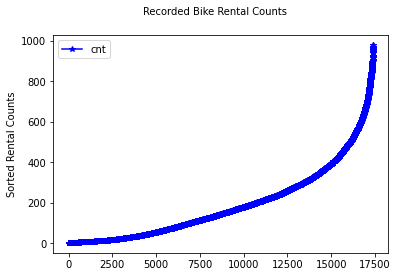

In [10]:
fig, ax = plt.subplots(1)
ax.plot(sorted(bikes_hour_df['cnt']), color = 'blue', marker = '*', label='cnt')
ax.legend(loc= 'upper left')
ax.set_ylabel('Sorted Rental Counts', fontsize = 10)
fig.suptitle('Recorded Bike Rental Counts', fontsize = 10)


Sorted counts of the bike rentals reveal that the majority of the rentals happen in 
the 0 - 400 ranges,
values higher than those are rare or outliers

## Quantitative Features vs. Rental Counts

lets create scatter plots of all our float data types and compare them against rental counts to visualize potential relationship

Text(0, 0.5, 'Count of all Biks Rented')

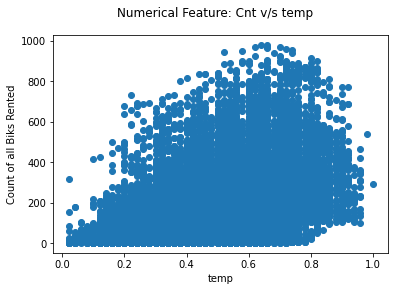

In [11]:
plt.scatter(bikes_hour_df['temp'], bikes_hour_df['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s temp')
plt.xlabel('temp')
plt.ylabel('Count of all Biks Rented')

As per the scatter plot we can see their is a liner relation between number of bike rented and temperature 
the warmmer the temp the more bike get rented

Text(0, 0.5, 'Count of all Biks Rented')

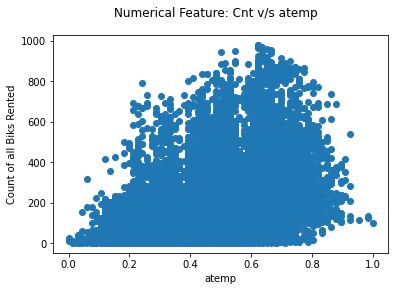

In [12]:
plt.scatter(bikes_hour_df['atemp'], bikes_hour_df['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s atemp')
plt.xlabel('atemp')
plt.ylabel('Count of all Biks Rented')

as we can see both the feature 'temp' and 'atemp' have similar distribution and may present redundancy and even multicollinearity. to keep things clean we can drop the 'atemp' feature

Text(0, 0.5, 'Count of all Biks Rented')

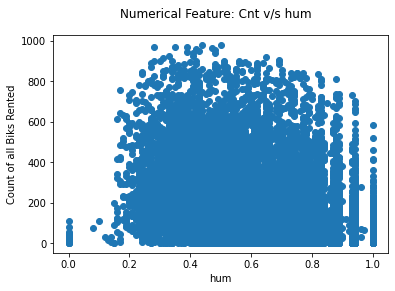

In [13]:
plt.scatter(bikes_hour_df['hum'], bikes_hour_df['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s hum')
plt.xlabel('hum')
plt.ylabel('Count of all Biks Rented')

Text(0, 0.5, 'Count of all Biks Rented')

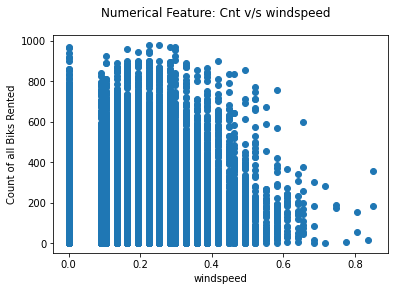

In [14]:
plt.scatter(bikes_hour_df['windspeed'], bikes_hour_df['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s windspeed')
plt.xlabel('windspeed')
plt.ylabel('Count of all Biks Rented')

For 'hum' or humidity looks like a big blob throught the edges so show some sparseness.
and for feature 'windspeed' shows inverse relationship with rentals

for conculsion we can say too much wind and bike rentals dont seem to mix

## Let’s Look at Categorical Features

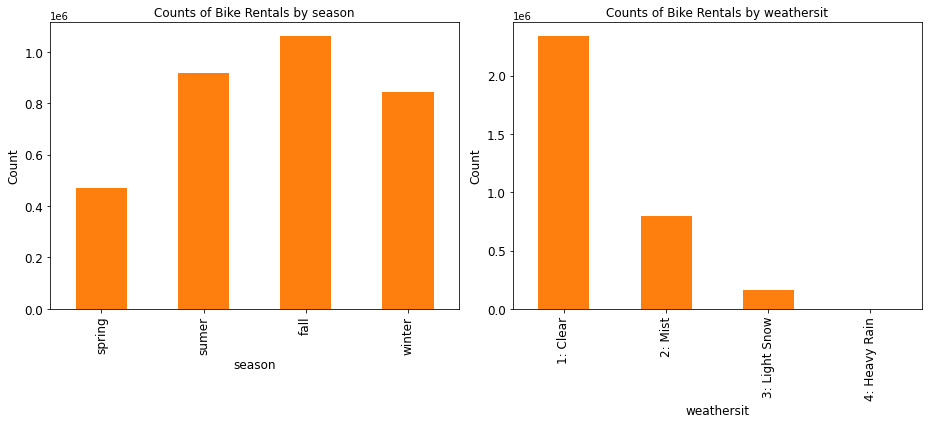

In [15]:
f,  (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

ax1 = bikes_hour_df[['season','cnt']].groupby(['season']).sum().reset_index().plot(kind='bar',
                                       legend = False, title ="Counts of Bike Rentals by season", 
                                         stacked=True, fontsize=12, ax=ax1)
ax1.set_xlabel("season", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xticklabels(['spring','sumer','fall','winter'])

 
ax2 = bikes_hour_df[['weathersit','cnt']].groupby(['weathersit']).sum().reset_index().plot(kind='bar',  
      legend = False, stacked=True, title ="Counts of Bike Rentals by weathersit", fontsize=12, ax=ax2)

ax2.set_xlabel("weathersit", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.set_xticklabels(['1: Clear','2: Mist','3: Light Snow','4: Heavy Rain'])

f.tight_layout()


the above graph of 'weathersit' shows that people tends to rent more bike in clear weather ad 'season' show the fall is the top season to rent bike.

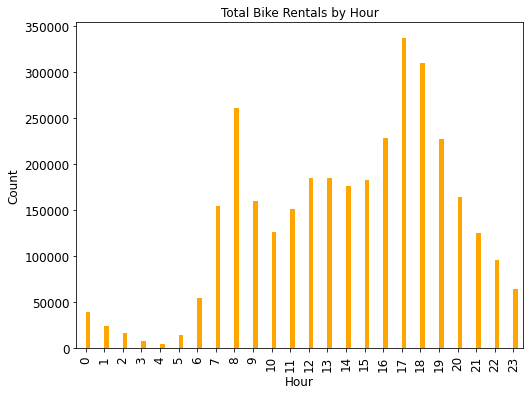

In [16]:
# alternative way of plotting using groupby
ax = bikes_hour_df[['hr','cnt']].groupby(['hr']).sum().reset_index().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Total Bike Rentals by Hour", 
                                       color='orange', fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

the feature 'hr' or we can say rental hours, clear shows peak office commute hours and afternoon rides are very popular bike time.

## Preparing the Data for modeling
In most case to make a machine leaarning model we need to clean the data and here we have done the cleaning in order to be 'model ready',
we have alredy drop some unused feature
we have no null values.

# Model with linear regression

simple model with all numerical variables

In [17]:
# lets copy for editing without effecting original
bikes_df_model_data = bikes_hour_df.copy()

outcome = 'cnt'

#making feature list for each modeling - experiment by adding feature to the exclusion list
feature = [feat for feat in list(bikes_df_model_data) if feat not in [outcome, 'instant', 'dteday']]

#spliting data into train and test portion
X_trian, X_test, y_train, y_test = train_test_split(bikes_df_model_data[feature],
                                                   bikes_df_model_data[outcome],
                                                   test_size=0.3, random_state=42)

from sklearn import linear_model
lr_model = linear_model.LinearRegression()

#training model in training set
lr_model.fit(X_trian, y_train)

# making predection using the test set
y_pred = lr_model.predict(X_test)

#root mean squared error
print('RMSE: %.2f' % sqrt(mean_squared_error(y_test, y_pred)))


RMSE: 139.14


so we get rmse  and we will use that as our benchmark score.but let see if we can improv on this.

#### Experimenting with Feature 
Let’s see if we can get a better score by experimenting with a few different techniques, including polynomials, nonlinear modeling, and leveraging time-series.

## Model using Polynomials - 2 & 4 degrees 

In [18]:
# lets copy for editing without effecting original
bikes_df_model_data = bikes_hour_df.copy()

outcome = 'cnt'

#making feature list for each modeling - experiment by adding feature to the exclusion list
feature = [feat for feat in list(bikes_df_model_data) if feat not in [outcome, 'instant', 'dteday']]

X_trian, X_test, y_train, y_test = train_test_split(bikes_df_model_data[feature],
                                                   bikes_df_model_data[outcome],
                                                   test_size=0.3, random_state=42)

from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(2)
X_train = poly_feat.fit_transform(X_trian)
X_test = poly_feat.fit_transform(X_test)

from sklearn import linear_model
lr_model= linear_model.LinearRegression()

# training the model on traning set
lr_model.fit(X_train, y_train)

# make the prediction
y_pred = lr_model.predict(X_test)

#root mean squared error
print("Root Mean squared error with PolynomialFeatures set to 2 degrees: %.2f" 
      % sqrt(mean_squared_error(y_test, y_pred)))

Root Mean squared error with PolynomialFeatures set to 2 degrees: 120.44


In [19]:
# lets copy for editing without effecting original
bikes_df_model_data = bikes_hour_df.copy()

outcome = 'cnt'

#making feature list for each modeling - experiment by adding feature to the exclusion list
feature = [feat for feat in list(bikes_df_model_data) if feat not in [outcome, 'instant', 'dteday']]

X_trian, X_test, y_train, y_test = train_test_split(bikes_df_model_data[feature],
                                                   bikes_df_model_data[outcome],
                                                   test_size=0.3, random_state=42)

from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(4)
X_train = poly_feat.fit_transform(X_trian)
X_test = poly_feat.fit_transform(X_test)

from sklearn import linear_model
lr_model= linear_model.LinearRegression()

# training the model on traning set
lr_model.fit(X_train, y_train)

# make the prediction
y_pred = lr_model.predict(X_test)

#root mean squared error
print("Root Mean squared error with PolynomialFeatures set to 4 degrees: %.2f" 
      % sqrt(mean_squared_error(y_test, y_pred)))

Root Mean squared error with PolynomialFeatures set to 4 degrees: 452.36


The score does improve using the 2nd and 4rd degree but then degrades beyond that point.

### Model with simple feature enginneering

In [20]:
def prepare_data_for_model(raw_dataframe, 
                           target_columns, 
                           drop_first = False, 
                           make_na_col = True):
    
    # dummy all categorical fields 
    dataframe_dummy = pd.get_dummies(raw_dataframe, columns=target_columns, 
                                     drop_first=drop_first, 
                                     dummy_na=make_na_col)
    return (dataframe_dummy)

# make a copy for editing without affecting original
bike_df_model_ready = bikes_hour_df.copy()
bike_df_model_ready = bike_df_model_ready.sort_values('instant')

# dummify categorical columns
bike_df_model_ready = prepare_data_for_model(bike_df_model_ready, 
                                            target_columns = ['season', 
                                                              'weekday', 
                                                              'weathersit'],
                                            drop_first = True)

# remove the nan colums in dataframe as most are outcome variable and we can't use them
bike_df_model_ready = bike_df_model_ready.dropna() 


outcome = 'cnt'
features = [feat for feat in list(bike_df_model_ready) if feat not in [outcome, 'instant',  'dteday']]  

 
X_train, X_test, y_train, y_test = train_test_split(bike_df_model_ready[features], 
                                                 bike_df_model_ready[['cnt']], 
                                                 test_size=0.5, 
                                                 random_state=42)
from sklearn import linear_model
model_lr = linear_model.LinearRegression()
 
# train the model on training set
model_lr.fit(X_train, y_train)

# make predictions using the testing set
predictions = model_lr.predict(X_test)
 
# print coefficients as this is what our web application will use in the end
print('Coefficients: \n', model_lr.coef_)

# root mean squared error
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, predictions)))
 

Coefficients: 
 [[ 8.15248087e+01 -3.05053709e-01  7.31700288e+00 -2.12212108e+01
   1.25047676e+01  2.56576596e+02  1.06754237e+02 -2.00225607e+02
   3.93454538e+01  2.54085994e+01  2.24746614e+00  7.16672281e+01
  -2.13162821e-14 -4.49090388e+00  6.22106355e-01 -2.38810162e+00
  -3.93756806e+00  1.47802402e+00  1.23008686e+01  0.00000000e+00
   9.33424984e+00 -2.40957826e+01  3.07030469e+01  0.00000000e+00]]
Root Mean squared error: 139.40


In [21]:
bike_df_model_ready[['weathersit_2.0', 'weathersit_3.0', 'weathersit_4.0']].head()

,weathersit_2.0,weathersit_3.0,weathersit_4.0
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


#### Trying a Nonlinear Model
As a final modeling experiment, let’s run our dummied data into a “Gradient Boosting Regressor” model from sklearn. Switching from one model to another in the sklearn package is trivial, and we only need to load the appropriate model in memory and change two lines

In [22]:
# simple approach - make a copy for editing without affecting original
bike_df_model_ready = bikes_hour_df.copy()
bike_df_model_ready = bike_df_model_ready.sort_values('instant')

# dummify categorical columns
bike_df_model_ready = prepare_data_for_model(bike_df_model_ready, 
                                             target_columns = ['season', 'weekday', 'weathersit'])
list(bike_df_model_ready.head(1).values)

# remove the nan colums in dataframe as most are outcome variable and we can't use them
bike_df_model_ready = bike_df_model_ready.dropna() 


outcome = 'cnt'
features = [feat for feat in list(bike_df_model_ready) if feat not in [outcome, 'instant', 'dteday']]  

 
X_train, X_test, y_train, y_test = train_test_split(bike_df_model_ready[features], 
                                                 bike_df_model_ready[['cnt']], 
                                                 test_size=0.5, 
                                                 random_state=42)
 
from sklearn.ensemble import GradientBoostingRegressor
model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train, np.ravel(y_train))
predictions = model_gbr.predict(X_test)

# root mean squared error
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, predictions)))
 

Root Mean squared error: 68.14


## Even More Complex Feature Engineering—Leveraging Time-Series

Info - Here is one last feature engineering experiment; this idea comes from data scientists over at Microsoft.4 The data is a ledger of bike rentals over time, so it is a time-series dataset. Whenever your dataset records events over time, you want to take that into account as an added feature. For example, an event that happened an hour ago is probably more important than one that happened a year ago. Time can also capture trends, changing needs and perceptions, etc. We want to create features that capture all those time-evolving elements!

For each row of data, we’ll add two new features: the sum of bicycle rentals for the previous hour, and the sum of bicycle rentals from two hours ago. The intuition here is that if we want to understand the current bicycling mood, we can start by looking at what happened an hour ago. If the rentals were great one hour ago, they’re probably going
to be good now. This time element can be seen as a proxy to prosperous or calamitous times, good or bad weather, etc.
To create a sum of bicycles per date and hour, we use Pandas extremely powerful “groupby()” function. We extract three fields, “dteday,” “hr,” and “cnt” and group the count by date and hour 

In [23]:

# prior hours
bikes_hour_df_shift = bikes_hour_df[['dteday','hr','cnt']].groupby(['dteday','hr']).sum().reset_index()
bikes_hour_df_shift.sort_values(['dteday','hr'])
# shift the count of the last two hours forward so the new count can take in consideratio how the last two hours went 
bikes_hour_df_shift['sum_hr_shift_1'] = bikes_hour_df_shift.cnt.shift(+1)
bikes_hour_df_shift['sum_hr_shift_2'] = bikes_hour_df_shift.cnt.shift(+2)

bike_df_model_ready =  pd.merge(bikes_hour_df, bikes_hour_df_shift[['dteday', 'hr', 'sum_hr_shift_1', 'sum_hr_shift_2']], how='inner', on = ['dteday', 'hr'])

# drop NAs caused by our shifting fields around
bike_df_model_ready = bike_df_model_ready.dropna()

outcome = 'cnt'
# create a feature list for each modeling - experiment by adding features to the exclusion list
features = [feat for feat in list(bike_df_model_ready) if feat not in [outcome, 'instant', 'dteday','casual', 'registered']]  

# split data into train and test portions and model
X_train, X_test, y_train, y_test = train_test_split(bike_df_model_ready[features], 
                                                 bike_df_model_ready[['cnt']], 
                                                 test_size=0.3, random_state=42)

from sklearn.ensemble import GradientBoostingRegressor
model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train, np.ravel(y_train))
predictions = model_gbr.predict(X_test)

# root mean squared error
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, predictions)))

Root Mean squared error: 41.97


Let's calculate the R^2 score of each feature to see how each helps us model bike demand (remember that an R^2 of 1 is perfect and an negative R^2 is bad):
    

In [24]:
# prior hours
np.mean(bikes_hour_df_shift['sum_hr_shift_1'])

189.47117044539073

In [25]:
 

# loop through each feature and calculate the R^2 score
features = ['hr', 'season', 'holiday', 'temp']
from sklearn import linear_model
from sklearn.metrics import r2_score

# split data into train and test portions and model
X_train, X_test, y_train, y_test = train_test_split(bike_df_model_ready[features], 
                                                 bike_df_model_ready[['cnt']], 
                                                 test_size=0.3, random_state=42)
    
for feat in features:
    model_lr = linear_model.LinearRegression()
    model_lr.fit(X_train[[feat]], y_train)
    predictions = model_lr.predict(X_test[[feat]])
    print('R^2 for %s is %f' % (feat, r2_score(y_test, predictions)))
    

R^2 for hr is 0.159431
R^2 for season is 0.025891
R^2 for holiday is -0.001242
R^2 for temp is 0.168313


Let's look at the coefficients from our model and what they mean:

In [26]:
# train the model on training set
model_lr.fit(X_train, y_train)

# make predictions using the testing set
predictions = model_lr.predict(X_test)
 
# root mean squared error
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, predictions)))
print('\n')
print('Intercept: %f' % model_lr.intercept_)

# features with coefficients 
feature_coefficients  = pd.DataFrame({'coefficients':model_lr.coef_[0], 
                                    'features':X_train.columns.values})

feature_coefficients.sort_values('coefficients')

Root Mean squared error: 148.22


Intercept: -103.609493


,coefficients,features
2,-28.296857,holiday
0,9.149312,hr
1,13.988868,season
3,311.148592,temp


Set up constants for our coefficients

In [27]:
# set up constants for our coefficients 
INTERCEPT = -121.029547
COEF_HOLIDAY = -23.426176   # day is holiday or not
COEF_HOUR = 8.631624        # hour (0 to 23)
COEF_SEASON_1 = 3.861149    # 1:springer
COEF_SEASON_2 = -1.624812   # 2:summer
COEF_SEASON_3 = -41.245562  # 3:fall
COEF_SEASON_4 = 39.009224   # 4:winter
COEF_TEMP = 426.900259      # norm temp in Celsius -8 to +39

# Predicting with coefficients - a lightweight way of getting estimates

Now we can use the above coefficients and the regression equation:
<B>y^ = b0 + bx1 + bxn</b>

It is important to remember that an x unit change in one feature works to estimate y when all other values are held constant. This means we need to get the mean value of all our features to plug into our regresssion equation.



In [28]:
np.mean(X_train['temp'])

0.49786730247471817

In [29]:
# mean values
MEAN_HOLIDAY = 0.0275   # day is holiday or not
MEAN_HOUR = 11.6        # hour (0 to 23)
MEAN_SEASON_1 = 1       # 1:spring
MEAN_SEASON_2 = 0       # 2:summer
MEAN_SEASON_3 = 0       # 3:fall
MEAN_SEASON_4 = 0       # 4:winter
MEAN_TEMP = 0.4967      # norm temp in Celsius -8 to +39


# try predicting something - 9AM with all other features held constant
rental_counts = INTERCEPT + (MEAN_HOLIDAY * COEF_HOLIDAY) \
    + (9 * COEF_HOUR) \
    + (MEAN_SEASON_1 * COEF_SEASON_1)  + (MEAN_SEASON_2 * COEF_SEASON_2) \
    + (MEAN_SEASON_3 * COEF_SEASON_3)  + (MEAN_SEASON_4 * COEF_SEASON_4) \
    + (MEAN_TEMP * COEF_TEMP)

print('Estimated bike rental count for selected parameters: %i' % int(rental_counts))    

Estimated bike rental count for selected parameters: 171
